In [15]:
%matplotlib inline
#Amitava Chakraborty - 11th May 2020
# Importing standard Qiskit libraries and configuring account
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, BasicAer, execute

from qiskit.compiler import transpile
from qiskit.quantum_info.operators.predicates import matrix_equal
from qiskit.circuit.library import HGate, RZGate, CXGate, CCXGate, XGate, SwapGate
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

# Diagonal Gate - Attach a diagonal gate to a circuit

In [3]:
def _get_diag_gate_matrix(diag):
    return np.diagflat(diag)

phases = [[0, 0], [0, 0.8], [0, 0, 1, 1], [0, 1, 0.5, 1],
               (2 * np.pi * np.random.rand(2 ** 3)).tolist(),
               (2 * np.pi * np.random.rand(2 ** 4)).tolist(),
               (2 * np.pi * np.random.rand(2 ** 5)).tolist()]
print(phases)

[[0, 0], [0, 0.8], [0, 0, 1, 1], [0, 1, 0.5, 1], [0.3130772707727624, 2.995763914785183, 4.390818217860872, 3.57937993266788, 3.9330482181043913, 3.4251210651067967, 3.798770958775562, 3.277081057821486], [6.252036411454136, 1.4710468218329535, 6.171026372733056, 5.551841170003102, 0.7898341005579823, 5.229412681646024, 6.140738008268811, 0.4113395048576593, 1.322304624626264, 1.9930873634745376, 3.1284153715292335, 2.365213640854087, 0.13802189515785776, 5.592199333295953, 1.6602022151536264, 5.681714510596627], [2.1370198453831084, 0.2989941952010655, 2.527090418498415, 0.044609467408399474, 3.6421654174641964, 1.5694913133104407, 2.745442035972912, 4.612309368314894, 2.3722273696359384, 6.033689771899979, 4.75872913224328, 2.221662441169588, 4.871791438680823, 3.030861467277196, 5.010306166632302, 0.8436592490904828, 5.7645418058863465, 5.653043065679778, 3.599405614658856, 2.664355503460113, 1.9900068704538258, 4.216873966326063, 2.010793537358124, 3.0155539794343733, 1.71552951529

In [4]:
for phase in phases:
    diag = [np.exp(1j * ph) for ph in phase]
    print('diagonal : ',diag)
    num_qubits = int(np.log2(len(diag)))
    print('qubits : ',num_qubits)
    q = QuantumRegister(num_qubits)
    qc = QuantumCircuit(q)
    qc.diagonal(diag, q[0:num_qubits])
    
    # Decompose the gate
    #qc = transpile(qc, basis_gates=['u1', 'u3', 'u2', 'cx', 'id'])
    
    # Simulate the decomposed gate
    simulator = BasicAer.get_backend('unitary_simulator')
    result = execute(qc, simulator).result()
    unitary = result.get_unitary(qc)
    unitary_desired = _get_diag_gate_matrix(diag)
    print(unitary)
    print('Desired Unitary : \n', unitary_desired)

diagonal :  [(1+0j), (1+0j)]
qubits :  1
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Desired Unitary : 
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
diagonal :  [(1+0j), (0.6967067093471654+0.7173560908995228j)]
qubits :  1
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.69670671+0.71735609j]]
Desired Unitary : 
 [[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.69670671+0.71735609j]]
diagonal :  [(1+0j), (1+0j), (0.5403023058681398+0.8414709848078965j), (0.5403023058681398+0.8414709848078965j)]
qubits :  2
[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         1.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.54030231+0.84147098j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.54030231+0.84147098j]]
Desired Unitary : 
 [[1.        +0.j         0.        +0.j         0.        +0.j
  0

[[ 1.        +0.j          0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.26406012-0.96450622j  0.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.92488223+0.38025369j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 ...
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ... -0.35344332+0.93545594j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.38932399-0.92110088j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
  -0.19124108-0.9815431j ]]
Desired Unitary : 
 [[-0.53644878+0.84393288j  0.        +0.j          0.        +0.j
  ...  0.        +0.j          0.        +0.j
   0.       

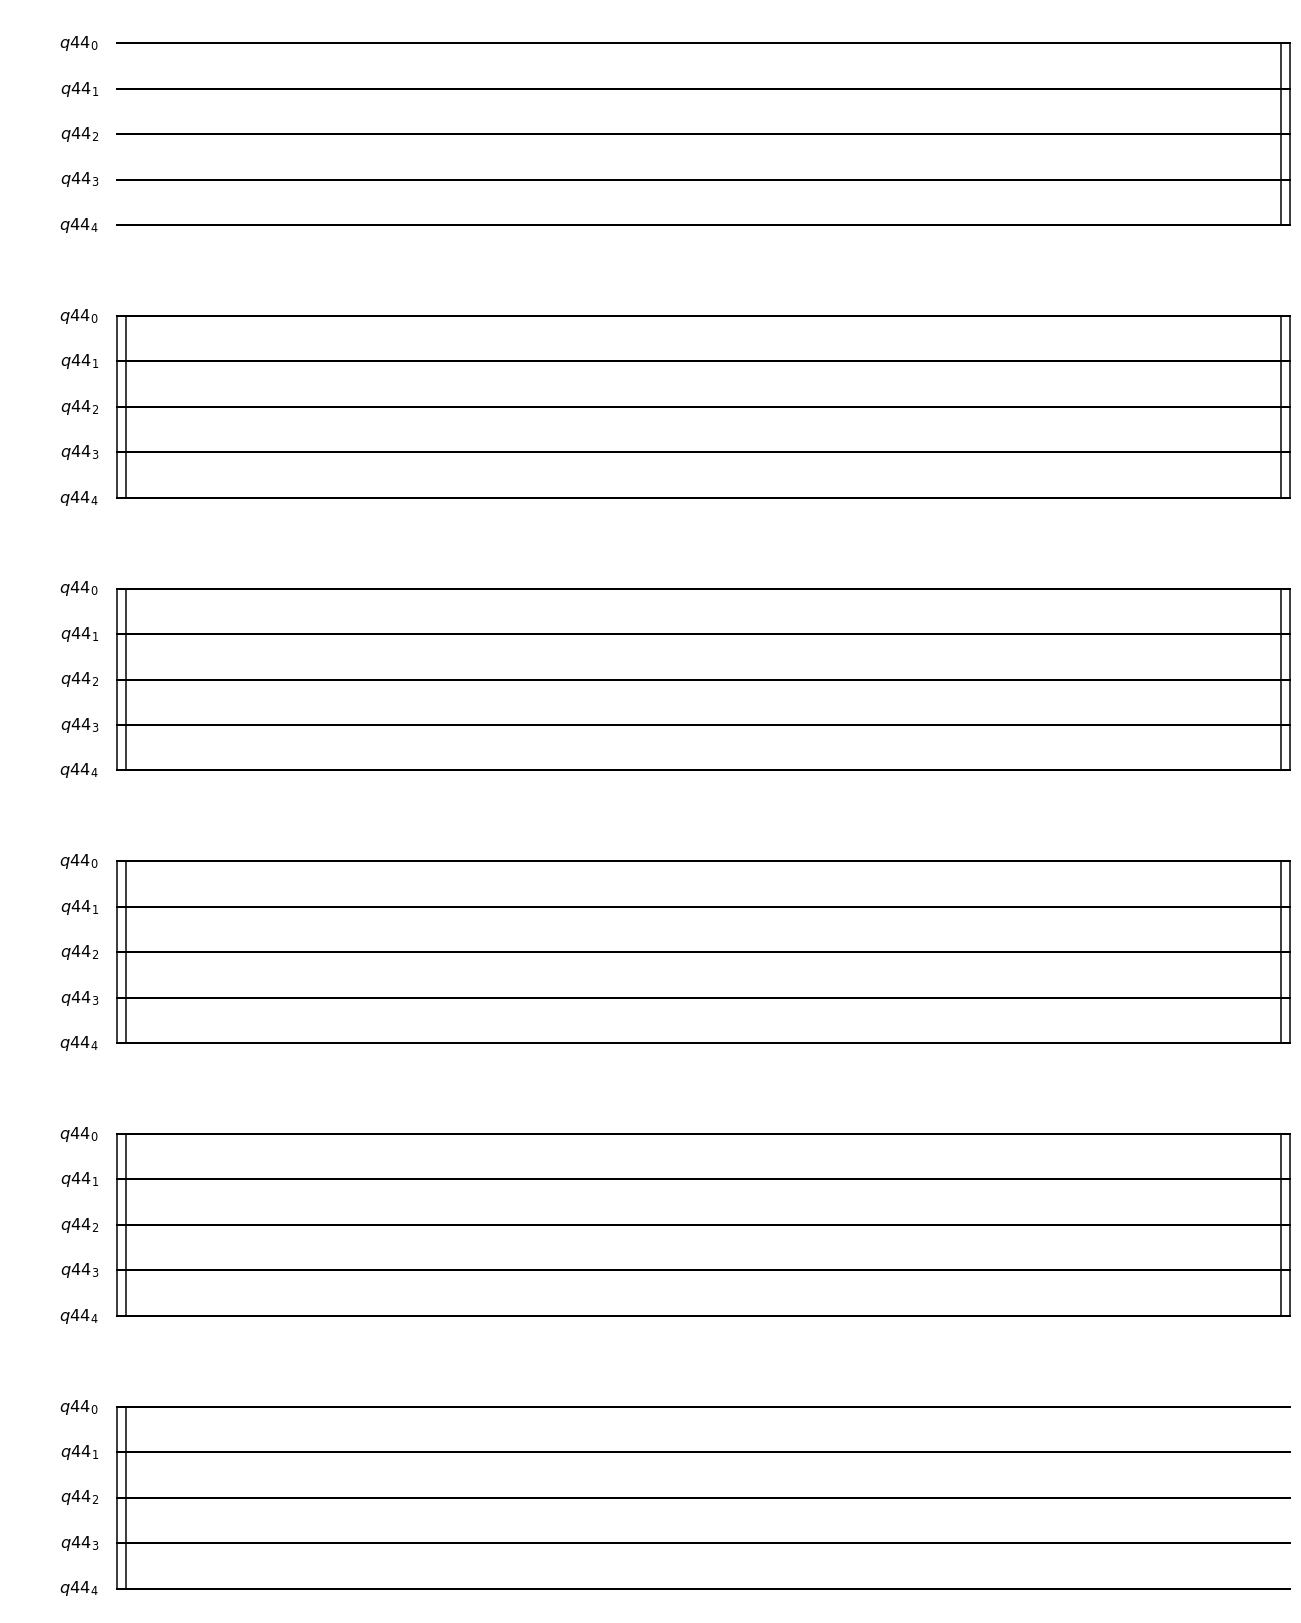

In [5]:
qc.draw('mpl')

qubits :  2


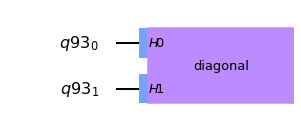

In [23]:
# diag (list) – list of the 2^k diagonal entries (for a diagonal gate on k qubits). Must contain at least two entries
# number of diagonal entries should be 2^k for k qubits
diag = [0,0, 1, 1]
num_qubits = int(np.log2(len(diag)))
print('qubits : ',num_qubits)
q = QuantumRegister(num_qubits)
qc = QuantumCircuit(q)
h = HGate()
qc.append(h, qargs=[0])
qc.append(h, qargs=[1])
qc.diagonal(diag, q[0:num_qubits])
qc.draw('mpl')

In [21]:
simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
sv = result.get_statevector(qc)
print(sv)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


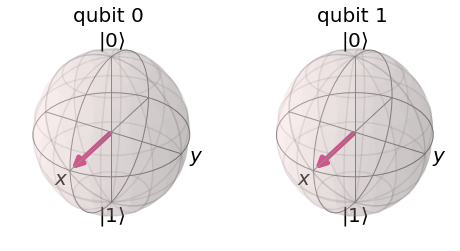

In [22]:
plot_bloch_multivector(sv)